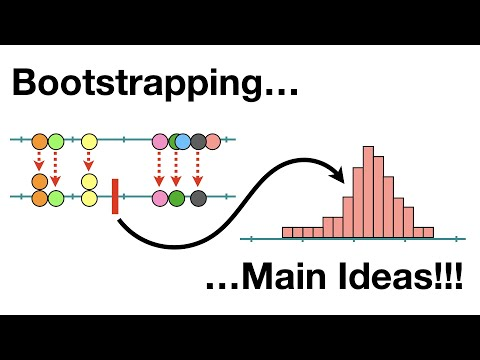

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

1)

The standard deviation (SD) of a dataset measures the amount of variability or dispersion in the original data. It quantifies how much individual data points deviate from the mean of the dataset. A high standard deviation indicates that the data points are spread out over a wider range of values, while a low standard deviation suggests that they are closer to the mean.

On the other hand, the standard error of the mean (SEM) estimates how far the sample mean is likely to be from the true population mean. It is calculated as the standard deviation of the sample divided by the square root of the sample size (n). The SEM decreases as the sample size increases, reflecting that larger samples provide more reliable estimates of the population mean.



2) Here is the steps that I understand by asking the chatbot: 

1. Bootstrap Sampling: resample your original dataset with replacement mulitple times to generate a distrubution of  sample means


2. for each boostrap sample, calculate the mean

3. determine the sample deviation of boostrap mean.

4. contruct a convidence level. Find the mean of the bootstrapped sample means.
Calculate the margin of error using the SEM. For a 95% CI, this margin is typically 
1.96
×
SEM
1.96×SEM (based on the normal distribution).
The confidence interval is then: CI=(Mean−1.96×SEM,Mean+1.96×SEM)

3)



1.Bootstrap Sampling: Resample your original dataset with replacement multiple times to generate a distribution of bootstrapped sample means (e.g., 1,000 or more means).

2.Sort the Bootstrapped Means: Once you have the bootstrapped sample means, sort them in ascending order.

3.Determine the Percentiles: To create a 95% confidence interval, identify the 2.5th and 97.5th percentiles of the sorted bootstrapped means. This means you will take the values at the positions corresponding to 2.5% and 97.5% of the total number of bootstrapped means. Here, we can use np.quartile(). 

4.Construct the Confidence Interval: The 95% confidence interval is then formed by taking these two percentile values:



In [2]:
#4)


import numpy as np

# Sample data
data = np.array([12, 15, 14, 10, 18, 20, 21, 17, 15, 19])  # Replace with your own sample data

# Number of bootstrap samples
n_bootstrap = 1000
bootstrap_means = np.empty(n_bootstrap)

# Bootstrapping process
np.random.seed(42)  # Set a seed for reproducibility
for i in range(n_bootstrap):
    # Sample with replacement
    sample = np.random.choice(data, size=len(data), replace=True)
    # Calculate the mean of the bootstrap sample
    bootstrap_means[i] = np.mean(sample)

# Calculate the 2.5th and 97.5th percentiles for the confidence interval
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

# Print the confidence interval
print(f"95% Bootstrap Confidence Interval for the Population Mean: ({lower_bound:.2f}, {upper_bound:.2f})")

# To modify this code for other population parameters (e.g., median):
# Just replace the line calculating bootstrap_means[i] with:
# bootstrap_means[i] = np.median(sample)

# This will give you the 95% bootstrap confidence interval for the population median.







95% Bootstrap Confidence Interval for the Population Mean: (13.80, 18.10)


explaination of the code: 


This code first import the numpy library and defines the sample data as numpyarray. After, it assigns bootstrap parameters to 1000 and this number was chosen because nigher number typlically leads to more stable confidence intervels. After, it begins the bootstrapping proccess. it sets a random seed for reproducibility. This ensures that every time the code is run, the same random samples are drawn, which is helpful for debugging and validation. Then, it use loop to generate the bootstrap samples. sample = np.random.choice(data, size=len(data), replace=True): This line creates a bootstrap sample by randomly selecting elements from the original dataset with replacement. The size=len(data) ensures that each bootstrap sample has the same size as the original dataset.
bootstrap_means[i] = np.mean(sample): This calculates the mean of the bootstrap sample and stores it in the bootstrap_means array. lastly, it calucates the precentile and print the output. 


5) 

Population Parameter:
This is a fixed value that describes a characteristic of the entire population (e.g., the true mean health score). 


Sample Statistic:
This is a calculated value derived from a sample drawn from the population.The sample statistic provides a point estimate of the population parameter, but it does not account for the uncertainty inherent in sampling. Confidence intervals allow us to express this uncertainty by providing a range of plausible values for the population parameter based on the sample statistic.





6) 

What is the process of bootstrapping?

1. collecting the original data
2. define the statstic of interest
3.resample with replacement
4. For each bootstrap sample, compute the statistic of interest (e.g., the mean or median). This generates a distribution of the statistic based on the bootstrap samples.
5.Repeat steps 3 and 4 many times (often 1,000 or more times) to build a robust distribution of the statistic.
6. contruct a convidence intervals 
7. interprets results 


What is the main purpose of bootstrapping?

The main purpose of bootstrapping is to estimate the sampling distribution of a statistic (such as the mean, median, variance, etc.). It can estimating confidence intervals and assessing variablity. Bootstrapping allows for the construction of confidence intervals for various statistics without relying on strong parametric assumptions. This is particularly useful for data that may not follow a normal distribution.



If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

What I will do is collect the sample data, define my hypothesis clearly about the population mean. After, I will resample my original data set again and again and finally caculate the mean. Next, coonstuct a confidence interval and check wheather my hypothesis mena falls within the interval. 




7)


A confidence interval that overlaps zero suggests that the true population parameter (e.g., the average effect of a drug) could plausibly be zero, meaning there is a possibility that the drug has no effect. This leads to "failing to reject the null hypothesis" because, despite the observed sample mean being different from zero, the uncertainty reflected in the confidence interval indicates that we cannot confidently assert that the drug has a significant effect. The presence of zero within the interval implies that the effect could range from negative (indicating harm) to positive (indicating benefit), making it ambiguous.





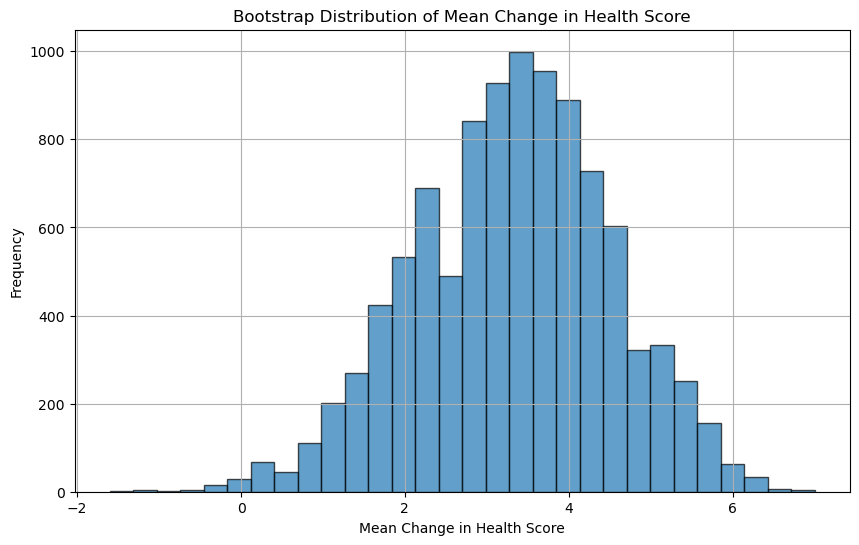

In [3]:
# 8) 
# visual representation

import numpy as np
import matplotlib.pyplot as plt

# Creating the dataset
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Convert to numpy arrays
initial_health = np.array(data['InitialHealthScore'])
final_health = np.array(data['FinalHealthScore'])

# Calculate change in health score
change_in_health = final_health - initial_health

# Number of bootstrap samples
n_bootstrap = 10000
bootstrap_means = np.empty(n_bootstrap)

# Bootstrapping process
np.random.seed(42)
for i in range(n_bootstrap):
    # Sample with replacement
    sample = np.random.choice(change_in_health, size=len(change_in_health), replace=True)
    bootstrap_means[i] = np.mean(sample)

# Plot histogram of bootstrap means
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, edgecolor='black', alpha=0.7)
plt.title('Bootstrap Distribution of Mean Change in Health Score')
plt.xlabel('Mean Change in Health Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show('png')





8) 

written report:
 
 
Introduction: 

The null hypothesis that the vaccine does not influence the health scores of individuals. 





here is my quantitive analysis: 

Mean Initial Health Score: 81.0
Mean Final Health Score: 84.3
Standard Deviation of Initial Health Scores: 2.83
Standard Deviation of Final Health Scores: 2.11
Mean Change in Health Score: 3.3
Standard Deviation of Change in Health Scores: 4.03

Bootstrap Analysis
95% Confidence Interval for Mean Change in Health Score: (0.9, 5.6)



Interpretations: 

The analysis shows that the average scores is increasing from 81 to 84.3 afterting receiving the vaccine.The mean change in health scores, based on the sample data, is 3.3 points improvement with a standard deviation of 4.03, indicating variability in how different individuals responded to the vaccine.



conclusion:

I reject the hypothesis because the data clearly shows that the injection of the vaccines has a positive effect, leading to an imporement in health scores according to the quantitive analysis. I terms of visualizations, the histogram of the data shows a distribution skewed away from zero towards positive values, and the box plots demonstrate an upward shift in the median from the initial to the final health scores.




Yes, I did use wiki-textbook and interatced with chatbot with the concept that I don't understand. 

here is the link for my chatbot:

https://chatgpt.com/c/66f99cd6-45c8-8013-81c7-8803de360c82
